# Estudo de Caso: Previsão de Churn de Clientes

## Objetivo do Experimento

Neste experimento, estamos desenvolvendo uma **análise preditiva** para prever a probabilidade de um cliente cancelar um serviço (churn) com base em características comportamentais e demográficas. A previsão de churn é uma aplicação comum em **Data Science** para negócios, especialmente em setores como telecomunicações, bancos e provedores de serviços digitais, onde manter clientes ativos é crucial para a rentabilidade.

## Motivação

A retenção de clientes é um dos principais desafios enfrentados por empresas modernas. Saber quais clientes estão propensos a cancelar o serviço permite que a empresa tome ações preventivas, como oferecer benefícios, promoções ou suporte personalizado. Identificar esses clientes antecipadamente, através de modelos preditivos, é uma forma eficaz de reduzir a taxa de churn e melhorar o relacionamento com o cliente.

## Descrição dos Dados

O conjunto de dados utilizado contém informações sobre clientes de um banco, com atributos como:
- **Idade**: A idade do cliente.
- **Saldo**: O saldo em conta do cliente.
- **Número de Produtos**: Quantidade de produtos que o cliente utiliza.
- **Gênero**: Gênero do cliente (masculino ou feminino).
- **Localidade**: O país de residência do cliente.
- **...**: E outras variáveis que podem impactar o comportamento do cliente.

A variável-alvo (target) é a coluna **"Exited"**, que indica se o cliente cancelou ou não o serviço.

## Metodologia

1. **Pré-processamento dos Dados**: Limpeza dos dados, codificação de variáveis categóricas, tratamento de valores ausentes e divisão dos dados em conjuntos de treino e teste.
2. **Exploração e Análise dos Dados**: Análise estatística e visualização dos dados para entender as relações entre as variáveis e identificar padrões.
3. **Construção do Modelo Preditivo**: Implementação de um modelo de machine learning para prever a variável-alvo (churn).
4. **Avaliação do Modelo**: Avaliação da performance do modelo utilizando métricas como Acurácia, Precision, Recall e AUC-ROC.
5. **Interpretação dos Resultados**: Identificação das principais variáveis que influenciam o churn e discussão das aplicações práticas desse conhecimento.

---

Carregamento e Visualização de Dados

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [43]:
df = pd.read_csv('Bases/Churn_Modelling.csv')

In [44]:
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

Pré Processamento de Dados

1.Removendo Colunas Irrelevantes

In [45]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

2. Covertendo variáveis categóricas

In [46]:
label_encoder_geography = LabelEncoder()

In [47]:
df['Geography'] = label_encoder_geography.fit_transform(df['Geography'])

In [48]:
label_encoder_gender = LabelEncoder()

In [49]:
df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])

3. Separando variáveis independetes(X) e dependetes(Y)

In [50]:
X = df.drop('Exited', axis=1)

In [51]:
y = df['Exited']

4. Divisão entre dados de treino e teste

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Modelo Preditivo

In [54]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,-1]

Visualização de dados

In [56]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1545   62]
 [ 209  184]]


In [57]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [58]:
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

print(f"AUC-ROC: {roc_auc:.2f}")

AUC-ROC: 0.86


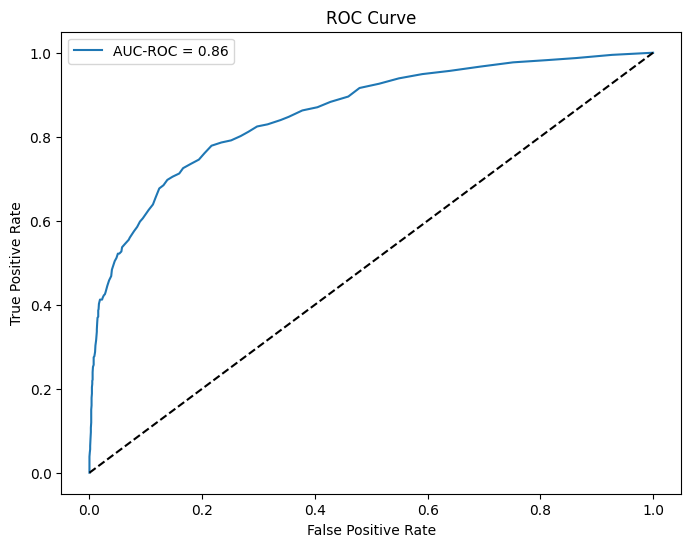

In [59]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC-ROC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [60]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

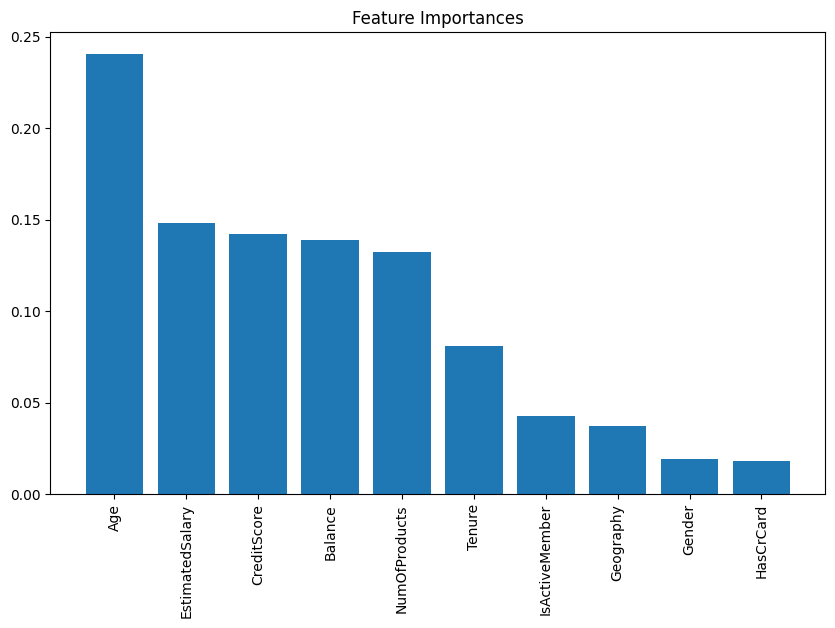

In [26]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()